## Summary
This is the 'Exploratory Data Analysis' portion of a vehicle appraisal data analysis using the 'Automobile Data Set' from UCI's Machine Learning Repository. The uncleaned data is taken from 1985 Ward's Automotive Yearbook. This section of the data analysis includes exploring relationships within the data to find features or characteristics to predict the price of a vehicle. Additional sections of the data analysis, including data wrangling, model development, and model evaluation, are written in separate notebooks which can be found within the same repository.

## Importing Libraries and Data

In [2]:
# importing tools and data
%config Completer.use_jedi = False

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
# read the CSV file
df = pd.read_csv('resources/clean_df.csv')

## Finding Relationships
* explore continuous and categorical variables

In [4]:
df.dtypes

Unnamed: 0             int64
symboling              int64
normalized-losses      int64
make                  object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
highway-L/100km      float64
horsepower-binned     object
fuel-type-diesel       int64
fuel-type-gas          int64
dtype: object

In [5]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,...,0.144301,-0.022505,-0.195662,0.027956,0.020344,-0.118214,-0.099157,-0.078346,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458


In [6]:
df[['bore','stroke','compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


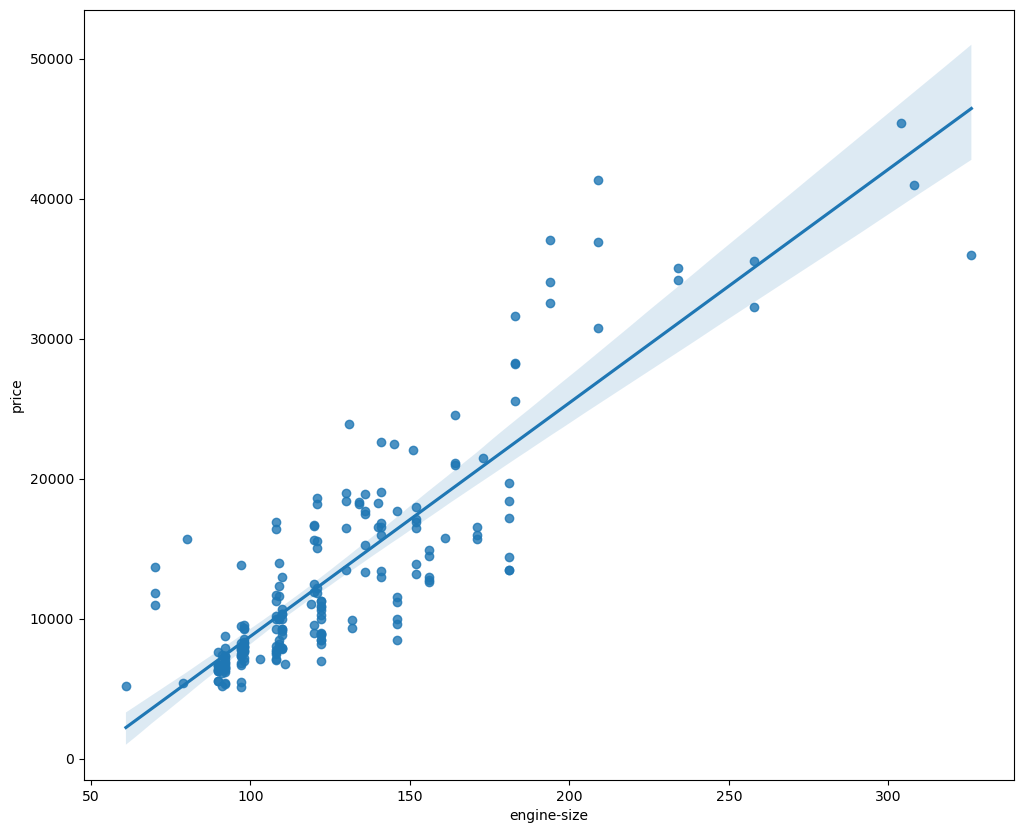

In [7]:
# plotting the positive linear relationship between 'engine-size' and 'price' using a scatterplot
plt.figure(figsize=(12,10))
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim=(0,)
plt.show()

In [8]:
# finding the approximate correlation between the two attributes
df[['engine-size','price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


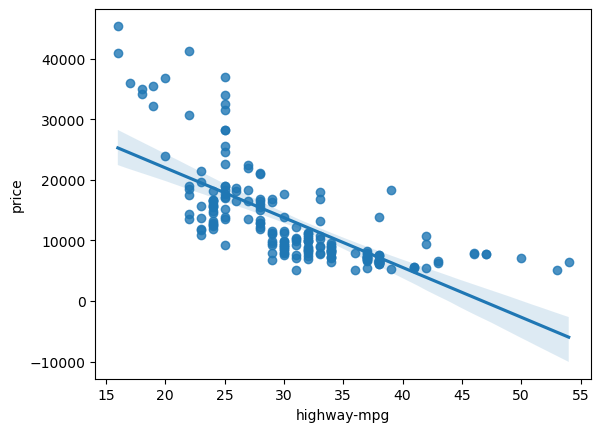

In [9]:
# observing a negative linear relationship between 'highway-mpg' and 'price'
sns.regplot(x='highway-mpg', y='price', data=df)
plt.show()

In [10]:
# finding the approximate correlation between 'highway-mpg' and 'price'
df[['highway-mpg','price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


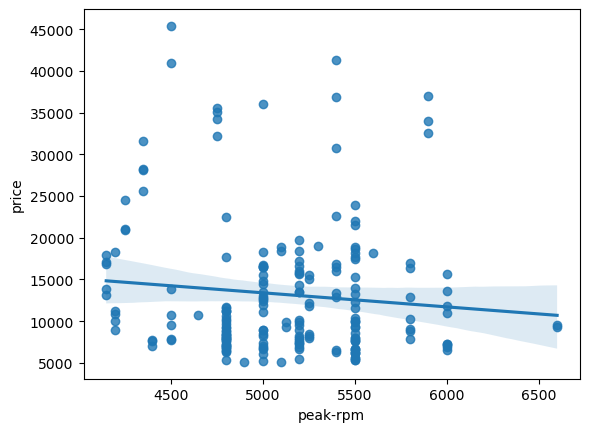

In [11]:
# observing a weak and variable relationship between 'peak-rpm' and 'price' attributes
sns.regplot(x='peak-rpm', y='price', data=df)
plt.show()

In [12]:
# finding the approximate correlation between 'peak-rpm' and 'price'
df[['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


In [13]:
# taking a look at the correlation between 'stroke' and 'price' attributes
df[['stroke','price']].corr()

,stroke,price
stroke,1.000000,0.082269
price,0.082269,1.000000


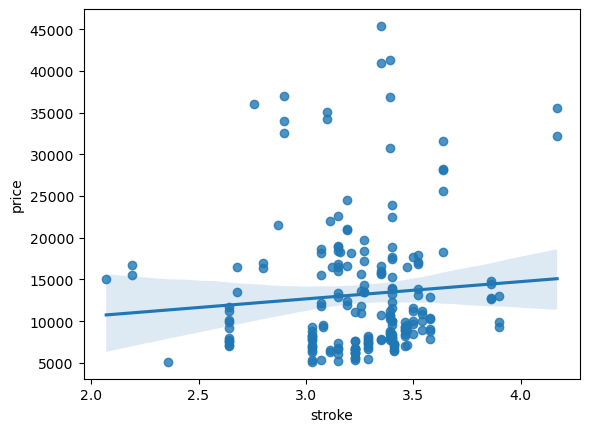

In [14]:
# observing a weak correlation between the 'stroke' and 'price' attributes
sns.regplot(x='stroke', y='price', data=df)
plt.show()

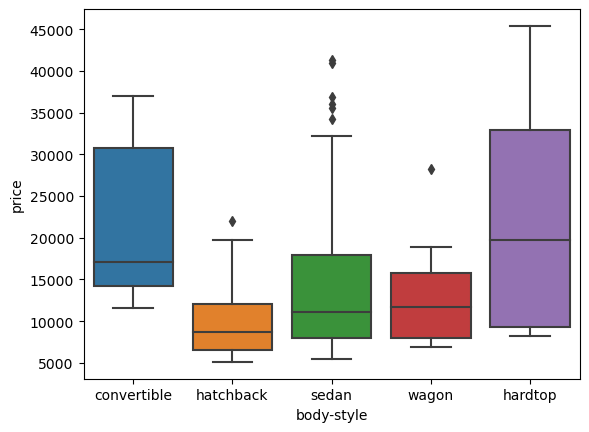

In [15]:
# exploring the relationship between 'body-style' and 'price'; weak; prices overlap
sns.boxplot(x='body-style', y='price', data=df)
plt.show()

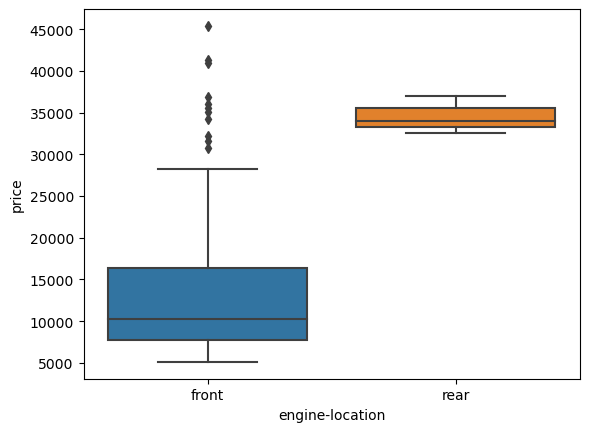

In [16]:
# exploring the relationship between 'engine-location' and 'price'; strong; prices are distinct
sns.boxplot(x='engine-location', y='price', data=df)
plt.show()

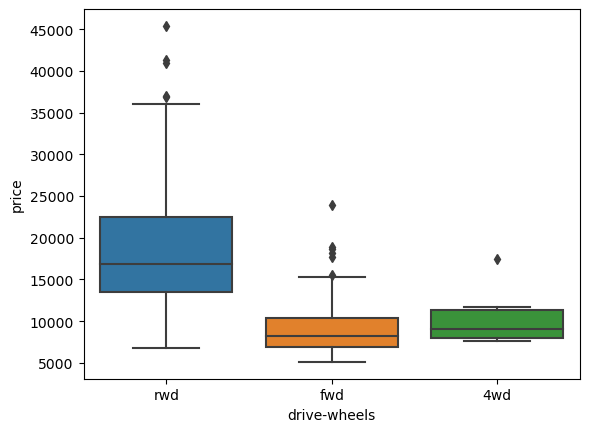

In [17]:
# exploring the relationship between 'drive-wheels' and 'price'; differs
sns.boxplot(x='drive-wheels', y='price', data=df)
plt.show()

### Attribute Relationships Summary
Strong relationships that reflect potentionally good predictors of 'price':
* 'engine-size' and 'price' <b>positive linear</b>
* 'highway-mpg' and 'price' <b>negative linear</b>
* 'peak-rpm' and 'price' <b>weak</b> and <b>variable</b>
* 'stroke' and 'price' <b>weak</b> and <b>variable</b>
* 'body-style' and 'price' <b>weak</b>
* 'engine-location' and 'price' <b>strong</b>
* 'drive-wheels' and 'price' <b>differs</b>

## Value Counts
* exploring counts

In [18]:
# descriptive statistics
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,115,94,118,198,145,157,92,153


In [19]:
# finding counts for 'drive-wheels' and assigning to its own dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels':'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [20]:
# renaming the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [21]:
# finding counts for 'engine-location' and assigning to its own dataframe; skewed
engine_location_counts = df['engine-location'].value_counts().to_frame()
engine_location_counts.rename(columns={'engine-location':'value_counts'}, inplace=True)
engine_location_counts.index.name = 'engine-location'
engine_location_counts

,value_counts
engine-location,
front,198
rear,3


## Grouping Data

In [22]:
# recalling categories of 'drive-wheels'
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

In [23]:
# grouping 'drive-wheels' and calculating the price for each 'body-style'; keeping index as is
df_group_one = df[['drive-wheels','body-style','price']]
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


In [24]:
# grouping by multiple variables
df_grp = df[['drive-wheels','body-style', 'price']]
group_test1 = df_grp.groupby(['drive-wheels','body-style'], as_index=False).mean()
group_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


In [25]:
# pivot to understand data
group_pivot = group_test1.pivot(index='drive-wheels', columns='body-style')
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [26]:
# replacing 'NaN' with zeroes 
group_pivot = group_pivot.fillna(0)
group_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [27]:
group_2 = df[['body-style','price']]
group_bodystyle = group_2.groupby(['body-style'], as_index=False).mean()
group_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


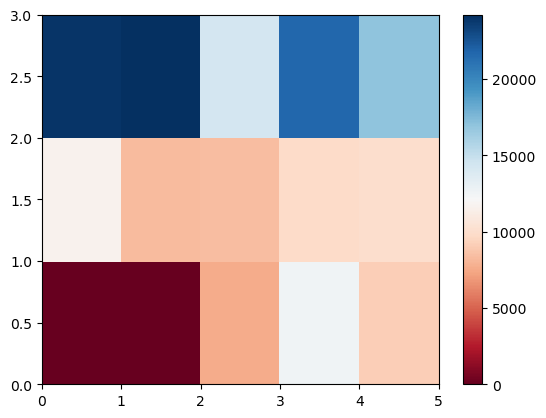

In [28]:
plt.pcolor(group_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

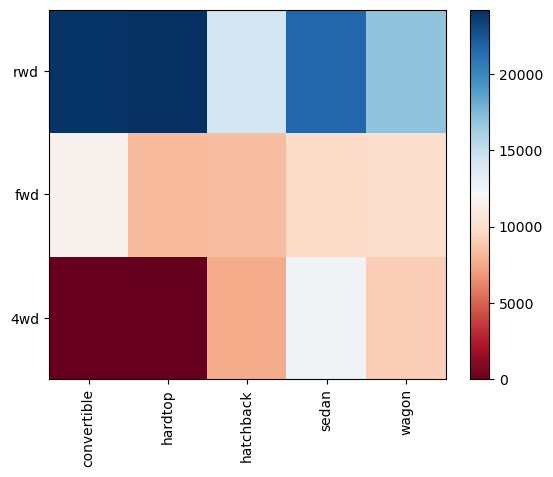

In [29]:
# breaking down plot to adjust axes
fig, ax = plt.subplots()
im = plt.pcolor(group_pivot, cmap='RdBu')

# labels
ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

row_labels = ('convertible','hardtop','hatchback','sedan','wagon')
col_labels = ('4wd','fwd', 'rwd')

# insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

# rotate the label if it's too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Groupby Analysis Summary
* 'drive-wheels' rwd vehicles are on average <b>most expensive</b>
* 'drive-wheels' 4wd and fwd are approximately the <b>same</b> price

## Pearson Correlation
* measuring statistical significant and strength of linear relationships

In [30]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,highway-L/100km,fuel-type-diesel,fuel-type-gas
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,...,0.144301,-0.022505,-0.195662,0.027956,0.020344,-0.118214,-0.099157,-0.078346,0.121454,-0.121454
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,-0.182196,0.075810,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.029807,-0.196735,0.196735
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,-0.114713,0.217300,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.181189,-0.101546,0.101546
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.250313,0.371178,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.577576,0.307237,-0.307237
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.159733,0.579795,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.707108,0.211187,-0.211187
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.189867,0.615056,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.736728,0.244356,-0.244356
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,0.259737,-0.087001,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.084301,0.281578,-0.281578
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.156433,0.757981,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.836921,0.221046,-0.221046
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.028889,0.822668,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.783465,0.070779,-0.070779
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.001263,0.566903,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.559112,0.054458,-0.054458


In [31]:
# 'wheel-base' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is 0.5846418222655081 with a P-value of 8.076488270732989e-20


In [32]:
# 'horsepower' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is 0.8096068016571054 with a P-value of 6.273536270650504e-48


In [33]:
# 'length' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is 0.690628380448364 with a P-value of 8.016477466158986e-30


In [34]:
# 'width' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is 0.7512653440522674 with a P-value of 9.200335510481516e-38


In [35]:
# 'curb-weight' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['curb-weight'],df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is 0.8344145257702846 with a P-value of 2.1895772388936914e-53


In [36]:
# 'engine-size' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is 0.8723351674455185 with a P-value of 9.265491622198389e-64


In [37]:
# 'bore' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is 0.5431553832626602 with a P-value of 8.049189483935489e-17


In [38]:
# 'city-mpg' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is -0.6865710067844677 with a P-value of 2.321132065567674e-29


In [39]:
# 'highway-mpg' vs. 'price'
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print('The Pearson Correlation Coefficient is', pearson_coef, 'with a P-value of', p_value)

The Pearson Correlation Coefficient is -0.7046922650589529 with a P-value of 1.7495471144477352e-31


### Pearson Correlation Summary
* 'wheel-base' vs. 'price' correlation is statistically <b>significant</b> but linear relationship <b>isn't very strong<b>
* 'horsepower' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b> is quite strong<b>
* 'length' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b>is moderately strong<b>
* 'width' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b>is quite strong<b>
* 'curb-weight' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b>is quite strong<b>
* 'engine-size' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b>is quite strong<b>
* 'bore' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b>is moderately strong<b>
* 'city-mpg' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b>is negative</b> and <b>moderately strong<b>
* 'highway-mpg' vs. 'price' correlation is statistically <b>significant</b> and linear relationship <b>is negative</b> and <b>moderately strong<b>

## ANOVA
* testing the statistical significane between two or more groups
* using .f_oneway to test H<sub>0</sub> that there is no difference in price per 'drive-wheels' value

In [40]:
# using the 'df_grp' from earlier to pull 'drive-wheels' and 'price' and group by 'drive-wheels'
group_anova = df_grp[['drive-wheels', 'price']].groupby(['drive-wheels'])
group_anova.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [41]:
# original 'df_grp'
df_grp

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [42]:
# obtaining certain values '4wd' and 'price'
group_anova.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [43]:
# ANOVA .f_oneway of all 'drive-wheels' values to test null hypothesis
f_score, p_value = stats.f_oneway(group_anova.get_group('fwd')['price'], group_anova.get_group('rwd')['price'], group_anova.get_group('4wd')['price'])
print('ANOVA results: F=', f_score, ', P=', p_value)

ANOVA results: F= 67.95406500780399 , P= 3.3945443577151245e-23


In [44]:
# ANOVA .f_oneway of 'fwd' and 'rwd'
f_score, p_value = stats.f_oneway(group_anova.get_group('fwd')['price'], group_anova.get_group('rwd')['price'])
print('ANOVA results: F=', f_score, ', P=', p_value)

ANOVA results: F= 130.5533160959111 , P= 2.2355306355677845e-23


In [45]:
# ANOVA .f_oneway of '4wd' and 'rwd'
f_score, p_value = stats.f_oneway(group_anova.get_group('4wd')['price'], group_anova.get_group('rwd')['price'])
print('ANOVA results: F=', f_score, ', P=', p_value)

ANOVA results: F= 8.580681368924756 , P= 0.004411492211225333


In [46]:
# ANOVA .f_oneway of '4wd' and 'fwd'
f_score, p_value = stats.f_oneway(group_anova.get_group('4wd')['price'], group_anova.get_group('fwd')['price'])
print('ANOVA results: F=', f_score, ', P=', p_value)

ANOVA results: F= 0.665465750252303 , P= 0.41620116697845666


### ANOVA Summary
* groups ('fwd' and 'price'), ('rwd' and 'price'), and ('4wd' and 'price') shows <b> certain statistical significance</b> and has a <b>strong correlation</b>
* groups ('fwd' and 'price'), ('rwd' and 'price') shows <b>certain statistical significance</b> and has a <b>strong correlation</b>
* groups ('4wd' and 'price'), ('rwd' and 'price') shows <b>moderate statistical significance</b> and has a <b>weak correlation</b>
* groups ('4wd' and 'price'), ('fwd' and 'price') shows <b>no statistical significance</b> and has a <b>weak correlation</b>

## Important Variables

Now we can see that there are several variables that are important to take into account when predicting car prices including:

#### Continuous Numerical Variables
* length
* width
* curb-weight
* engine-size
* horsepower
* city-mpg
* highway-mpg
* wheel-base
* bore

#### Categorical Variables
* drive-wheels

*Data analysis continued in '1985 Vehicle Appraisal Model Development'.*